### Supermarket Sales Analysis

#### Introduction
The purpose of this analysis is to explore supermarket sales data in order to identify patterns, customer behaviors, and performance drivers.  
This notebook will help provide actionable business insights that can support decision-making.  

#### Objectives
- Identify the top-performing product lines.  
- Analyze sales trends over time.   
- Examine payment methods and their popularity.   

#### Workflow
1. Import and preview the dataset.  
2. Data cleaning and preparation.  
3. Exploratory Data Analysis (EDA) with visualizations.  


In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [505]:
# Loading dataset
df = pd.read_csv("Supermarket_Sales.csv")
df

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,05-01-19,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,27-01-19,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-19,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,03-03-19,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,05-02-19,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,05-02-19,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,15-02-19,12:44,Cash,8.4


In [507]:
# getting info about the data (data profiling)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [509]:
# checking null values
df.isnull().sum()

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           9
Total            3
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [511]:
has_duplicates = df.duplicated().any()
if has_duplicates:
    print("There are dublicates")
else:
    print("No dublicates")

There are dublicates


### Data cleaning

In [516]:
# removing duplicates
df = df.drop_duplicates(keep='first')
df

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,05-01-19,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,27-01-19,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-19,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,0,1,0,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,29-01-19,13:46,Ewallet,6.2
996,303-96-2227,B,0,0,1,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,02-03-19,17:16,Ewallet,4.4
997,727-02-1313,A,1,0,0,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,09-02-19,13:22,Cash,7.7
998,347-56-2442,A,1,0,0,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,22-02-19,15:33,Cash,4.1


In [518]:
# selecting which columns to deal with
branch_columns = ['Yangon', 'Naypyitaw', 'Mandalay']

# Adding values to the column 'Branch'
df['Branch'] = df[branch_columns].idxmax(axis=1)

# deleting the unnecessary columns
df.drop(branch_columns, axis=1, inplace=True)
df

C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\3507429033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Branch'] = df[branch_columns].idxmax(axis=1)
C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\3507429033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(branch_columns, axis=1, inplace=True)


,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,05-01-19,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,27-01-19,8 - 30 PM,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-19,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,29-01-19,13:46,Ewallet,6.2
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,02-03-19,17:16,Ewallet,4.4
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,09-02-19,13:22,Cash,7.7
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,22-02-19,15:33,Cash,4.1


### data consistency 

In [523]:
# Reviewing the top 100 records for "unit price" column
df['Unit price'].head(100)

0         74.69
1         15.28
2         46.33
3         58.22
4         86.31
        ...    
95        97.16
96        87.87
97    12.45 USD
98        52.75
99         82.7
Name: Unit price, Length: 100, dtype: object

In [525]:
# removing spaces and currency
df['Unit price'] = df['Unit price'].replace(r'\s*USD\s*', '', regex=True)

#converting datatype to number
df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce') 

df['Unit price'].head(100)

C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\3537397001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unit price'] = df['Unit price'].replace(r'\s*USD\s*', '', regex=True)
C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\3537397001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce')


0     74.69
1     15.28
2     46.33
3     58.22
4     86.31
      ...  
95    97.16
96    87.87
97    12.45
98    52.75
99    82.70
Name: Unit price, Length: 100, dtype: float64

In [527]:
df['Customer type'] = df['Customer type'].replace('Memberr', 'Member')

C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\1844599616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer type'] = df['Customer type'].replace('Memberr', 'Member')


In [529]:
# Recalculating "Tax 5%" column to fill the "NaN" values 
df['Tax 5%'] = df['Unit price'] * df['Quantity'] * 0.05
df

C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\1867562582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tax 5%'] = df['Unit price'] * df['Quantity'] * 0.05


,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,05-01-19,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-19,8 - 30 PM,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-19,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,29-01-19,13:46,Ewallet,6.2
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,02-03-19,17:16,Ewallet,4.4
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,09-02-19,13:22,Cash,7.7
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,22-02-19,15:33,Cash,4.1


In [531]:
# Recalculating "Total" column to fill the "NaN" values
df['Total'] = df['Unit price'] * df['Quantity'] + df['Tax 5%']
df

C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\1457466569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Unit price'] * df['Quantity'] + df['Tax 5%']


,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,05-01-19,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-19,8 - 30 PM,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-19,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,29-01-19,13:46,Ewallet,6.2
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,02-03-19,17:16,Ewallet,4.4
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,09-02-19,13:22,Cash,7.7
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,22-02-19,15:33,Cash,4.1


In [533]:
# checking if there are null values
df.isnull().sum()

Invoice ID       0
Branch           0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [535]:
# changing the datatype of the "date" column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df

C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\3948658592.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\3948658592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8 - 30 PM,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,6.2
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-02-03,17:16,Ewallet,4.4
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-09-02,13:22,Cash,7.7
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,4.1


In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   Customer type  1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   Product line   1000 non-null   object        
 5   Unit price     1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Tax 5%         1000 non-null   float64       
 8   Total          1000 non-null   float64       
 9   Date           1000 non-null   datetime64[ns]
 10  Time           1000 non-null   object        
 11  Payment        1000 non-null   object        
 12  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 109.4+ KB


In [539]:
# showing the first top rows in "time" column
df['Time'].head(20)

0         13:08
1         10:29
2         13:23
3     8 - 30 PM
4         10:37
5         18:30
6         14:36
7         11:38
8         17:15
9         13:27
10        18:07
11        17:03
12        10:25
13        16:48
14        19:21
15        16:19
16        11:03
17        10:39
18        18:00
19        15:30
Name: Time, dtype: object

In [541]:
df['Time'].tail(20)

980    12:46
981    17:44
982    14:19
983    10:33
984    11:40
985    19:30
986    14:42
987    19:08
988    19:12
989    15:46
990    19:06
991    18:10
992    20:46
993    18:35
994    11:40
995    13:46
996    17:16
997    13:22
998    15:33
999    13:28
Name: Time, dtype: object

In [543]:
# replacing value to match the time format 

df['Time'] = df['Time'].replace('8 - 30 PM', '8:30')
df

C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\1590725444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Time'].replace('8 - 30 PM', '8:30')


,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:30,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,6.2
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-02-03,17:16,Ewallet,4.4
997,727-02-1313,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-09-02,13:22,Cash,7.7
998,347-56-2442,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,4.1


## Visualization

In [548]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [550]:
len(df['Product line'].unique())

6

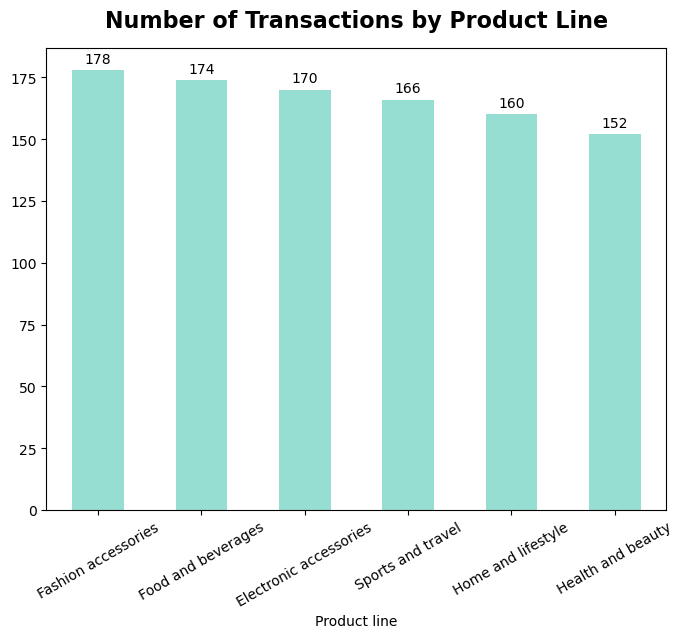

In [552]:
ax = df['Product line'].value_counts().plot(
    kind='bar',
    figsize=(8, 6),
    color='#96ded1'
)

ax.containers[0] 
ax.bar_label(ax.containers[0], padding=3)

plt.title('Number of Transactions by Product Line', fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=30)
plt.show()

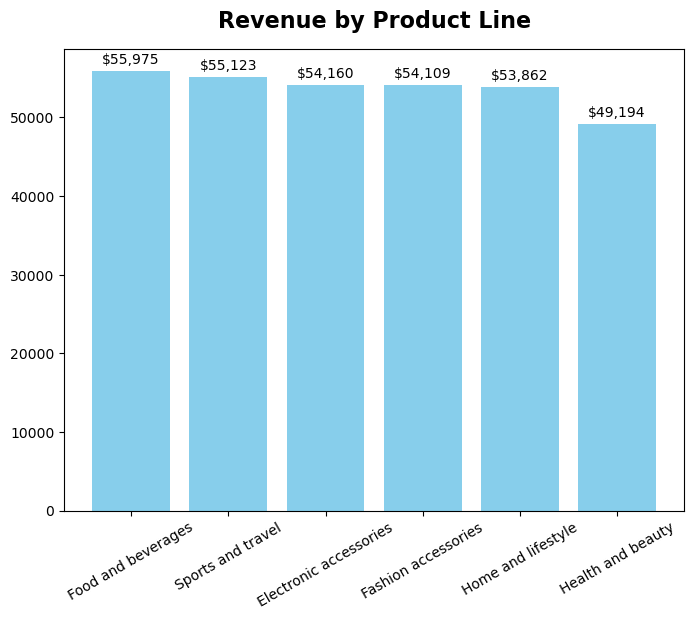

In [554]:
# sum revenue per product line
rev_by_product = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)


plt.figure(figsize=(8,6))
bars = plt.bar(rev_by_product.index, rev_by_product, color='skyblue')

#show data lable
plt.bar_label(bars, fmt='${:,.0f}', padding=3)

plt.title('Revenue by Product Line' ,  fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=30)
plt.show()


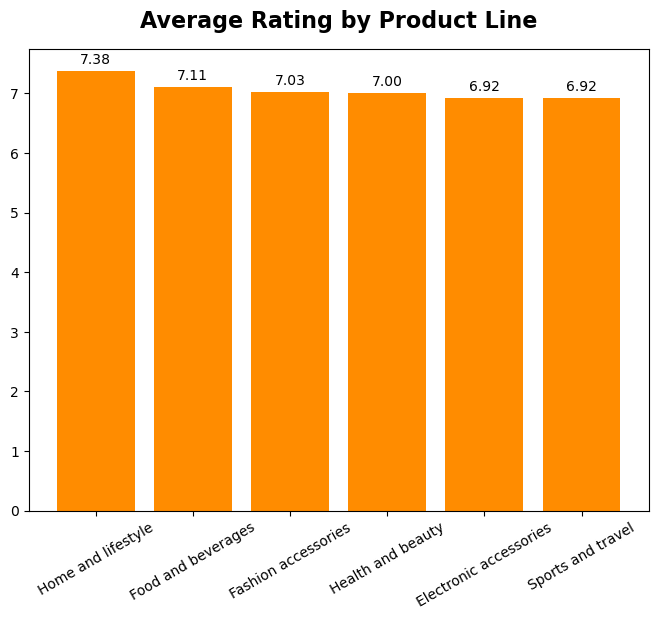

In [556]:
# calcutating AVG rating per product
avg_rating = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)


plt.figure(figsize=(8, 6)) 
bars = plt.bar(avg_rating.index, avg_rating, color='darkorange')

#show data lable
plt.bar_label(bars, fmt='%.2f', padding=3, fontsize=10)

plt.title('Average Rating by Product Line', fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=30)
plt.show()

C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\3624543069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.strftime('%Y-%m')


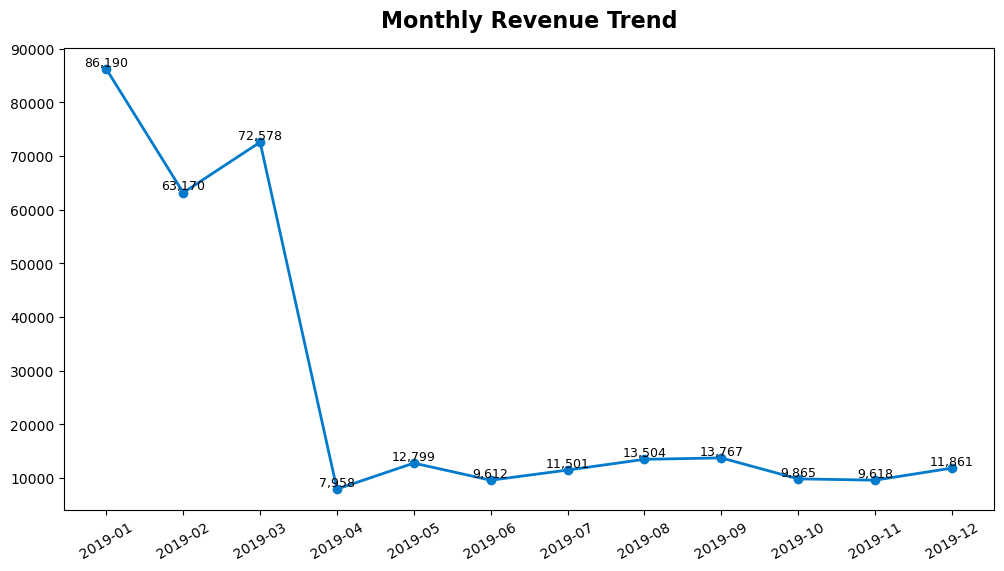

In [561]:

# extract month from date
df['Month'] = df['Date'].dt.strftime('%Y-%m')

# Sum monthly revenue
monthly_revenue = df.groupby('Month')['Total'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values,
         marker='o', color='#007ACC', linewidth=2)

# show data labels
for x, y in zip(monthly_revenue.index, monthly_revenue.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=9)


plt.title("Monthly Revenue Trend", fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=30)
plt.show()

C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\317292349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.strftime('%Y-%m')


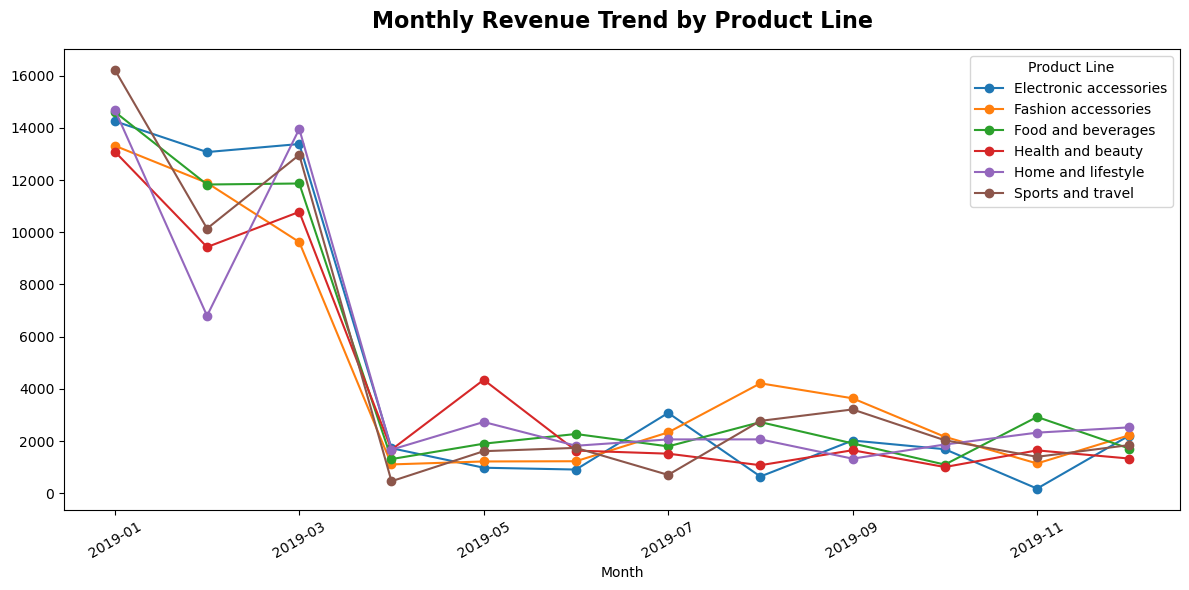

In [563]:

df['Month'] = df['Date'].dt.strftime('%Y-%m')

# sum monthly revenue for each Product line
monthly_revenue = df.groupby(['Month', 'Product line'])['Total'].sum().unstack()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(
    kind='line',
    marker='o',
    ax=plt.gca()
)


plt.title("Monthly Revenue Trend by Product Line", fontsize=16, fontweight='bold', pad=15)
plt.legend(title="Product Line")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

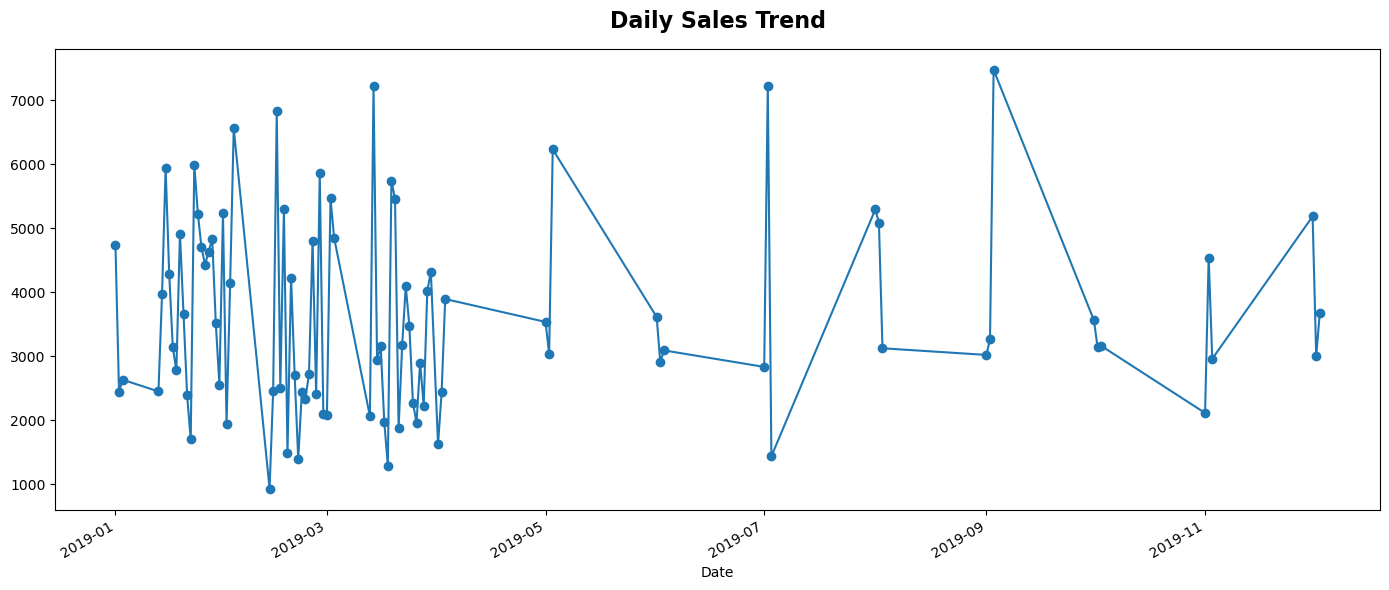

In [566]:
daily_sales = df.groupby('Date')['Total'].sum().sort_index()


daily_sales.plot(
    kind='line',
    figsize=(14, 6),
    marker='o'
)

plt.title("Daily Sales Trend", fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [568]:
len(df['Customer type'].unique())

3

In [570]:
df['Customer type'].unique()

array(['Normal', '-', 'Member'], dtype=object)

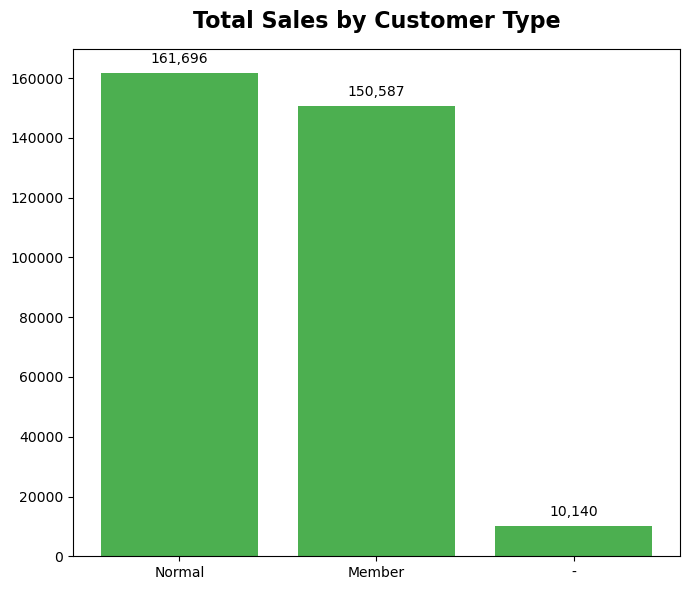

In [572]:
customer_sales = df.groupby('Customer type')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(7, 6))
bars = plt.bar(customer_sales.index, customer_sales, color='#4CAF50')


plt.bar_label(bars, fmt='{:,.0f}', padding=5, fontsize=10)


plt.title("Total Sales by Customer Type", fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

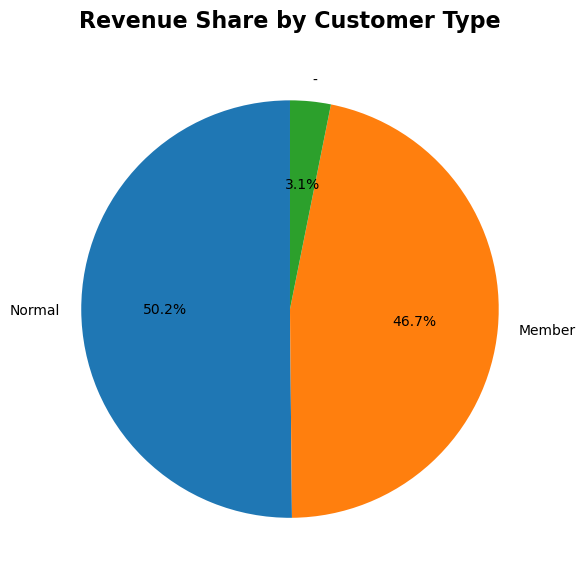

In [575]:
customer_sales = df.groupby('Customer type')['Total'].sum().sort_values(ascending=False)

customer_sales.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(6,6), 
    startangle=90
)

plt.title("Revenue Share by Customer Type" , fontsize=16, fontweight='bold', pad=15)
plt.ylabel("") 
plt.tight_layout()
plt.show()

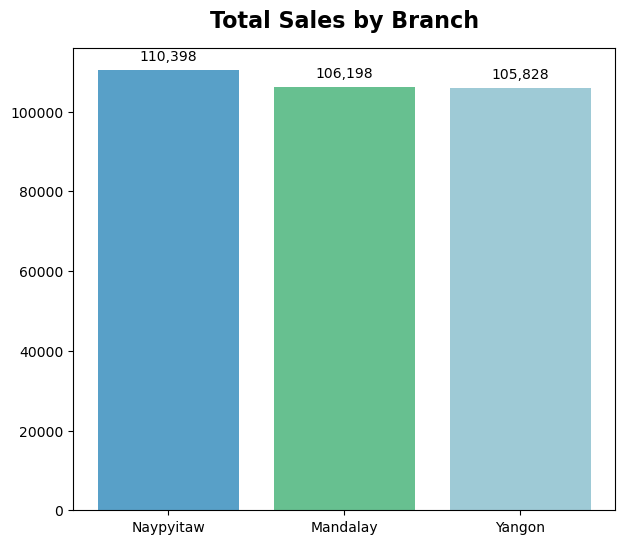

In [608]:
# calculating total sales per each branch
sales_by_branch = df.groupby('Branch')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(7, 6))

bars = plt.bar(sales_by_branch.index, sales_by_branch.values, 
               color=['#58A0C8', '#67C090', '#9ECAD6']) 
plt.bar_label(bars, fmt='{:,.0f}', padding=5)


plt.title('Total Sales by Branch', fontsize=16, fontweight='bold', pad=15)
plt.show()

C:\Users\el manar\AppData\Local\Temp\ipykernel_17000\811614133.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.strftime('%Y-%m')


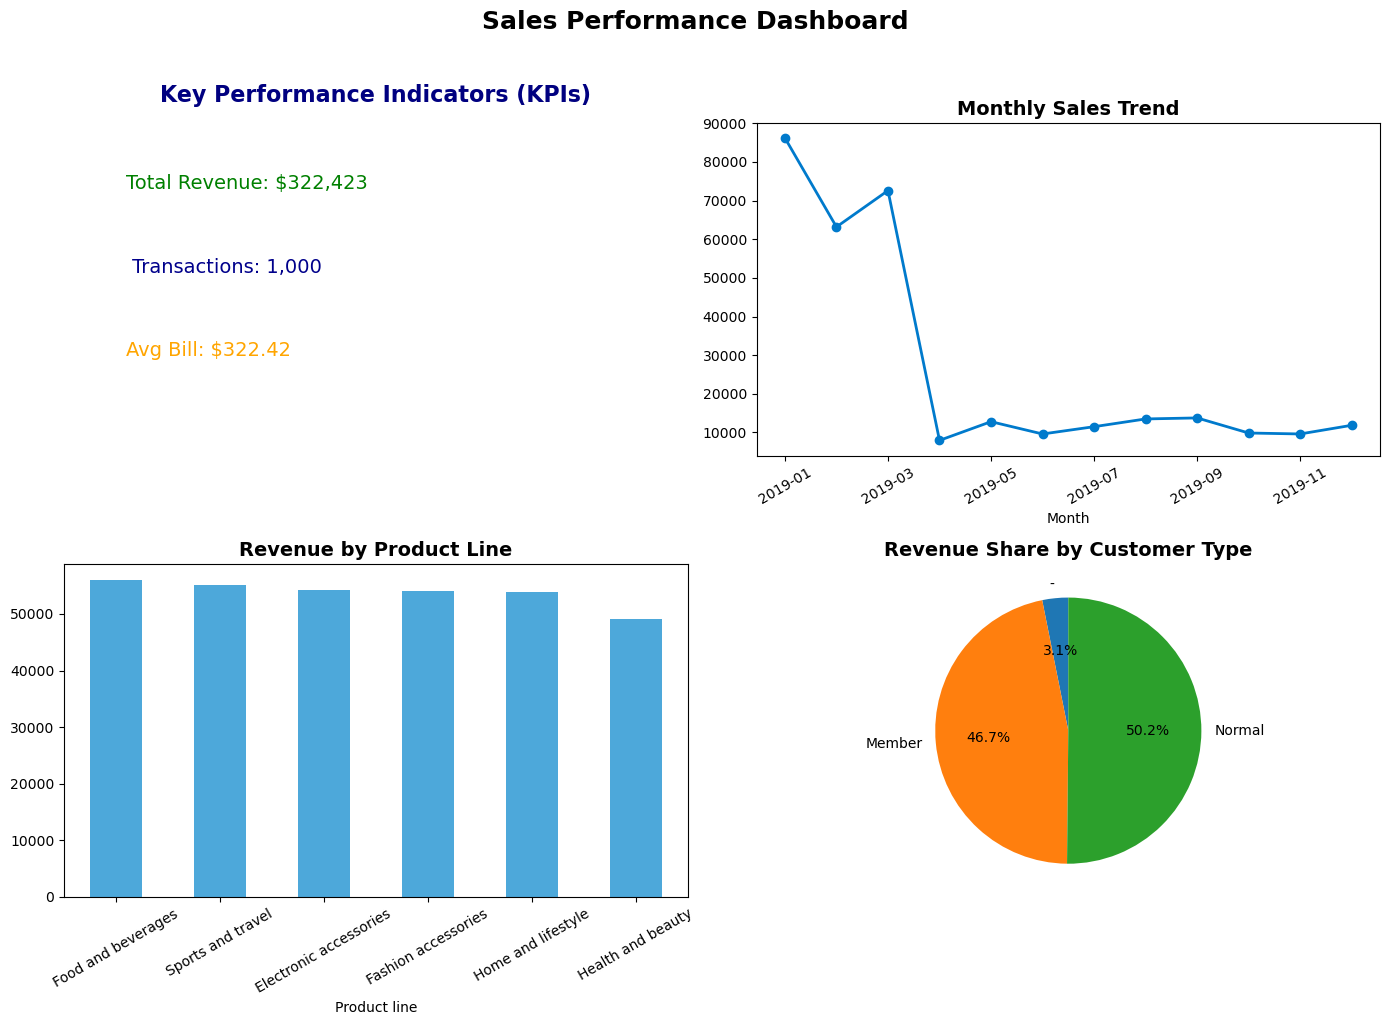

In [579]:

# ---- (KPIs) ----
total_revenue = df['Total'].sum()
transactions = df.shape[0]
avg_bill = df['Total'].mean()


# --- Monthly Sales ---
df['Month'] = df['Date'].dt.strftime('%Y-%m')
monthly_sales = df.groupby('Month')['Total'].sum()

# --- Revenue by Product Line ---
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# --- Revenue Share by Customer Type ---
customer_sales = df.groupby('Customer type')['Total'].sum()


# ---------------- (Dashboard) ----------------
plt.figure(figsize=(14, 10))
plt.suptitle("Sales Performance Dashboard", fontsize=18, fontweight='bold', y=1.02) 

# 1. KPI Cards
ax1 = plt.subplot(2, 2, 1)
ax1.axis("off")
ax1.set_title("Key Performance Indicators (KPIs)", fontsize=16, fontweight='bold', color='navy', pad=15)

ax1.text(0.1, 0.8, f"Total Revenue: ${total_revenue:,.0f}", fontsize=14, color='green')
ax1.text(0.1, 0.55, f" Transactions: {transactions:,}", fontsize=14, color='darkblue')
ax1.text(0.1, 0.3, f"Avg Bill: ${avg_bill:,.2f}", fontsize=14, color='orange')


# 2. Line Chart: Monthly Sales Trend
ax2 = plt.subplot(2, 2, 2)
monthly_sales.plot(kind='line', marker='o', ax=ax2, color='#007ACC', linewidth=2)

ax2.set_title("Monthly Sales Trend", fontsize=14, fontweight='bold')
plt.xticks(rotation=30)


# 3. Bar Chart: Revenue by Product Line
ax3 = plt.subplot(2, 2, 3)
product_sales.plot(kind='bar', color='#4DA8DA') 

ax3.set_title("Revenue by Product Line", fontsize=14, fontweight='bold')
plt.xticks(rotation=30)



# 4. Pie Chart: Revenue Share by Customer Type
ax4 = plt.subplot(2, 2, 4)
customer_sales.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    ax=ax4
)
ax4.set_title("Revenue Share by Customer Type", fontsize=14, fontweight='bold')
ax4.set_ylabel("") 
plt.tight_layout()
plt.show()

In [583]:
from IPython.display import FileLink

filename = "Supermarket-Sales.csv"
df.to_csv(filename, index=False)
FileLink(filename)

C:\Users\el manar\Supermarket-Sales.csv